In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter(
        [s[0][0] for s in rejected],
        [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k'
    )
    plt.scatter(
        [s[0][0] for s in admitted],
        [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k'
    )

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

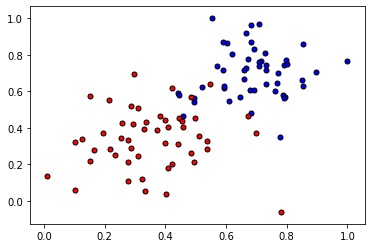

In [3]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [15]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# Output (prediction) formula
def output_formula_sigmoid(features, weights, bias):
    y_pred = sigmoid(np.matmul(features, weights) + bias)
    return y_pred

# Activation softmax fx
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))
    
# Output (prediction) formula
def output_formula_softmax(features, weights, bias):
    y_pred = softmax(np.matmul(features, weights) + bias)
    return y_pred


# Error (log-loss) formula
def error_formula(y, output):
    error = -( y*np.log10(output) + (1-y)*(np.log10(1-output)) )
    return error    

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula_softmax(x, weights, bias)
#     output = output_formula_sigmoid(x, weights, bias)
    new_weights = weights + learnrate*(y-output)*x
    new_bias = bias + learnrate*(y-output)
    return new_weights, new_bias
    

In [66]:
np.random.seed(44)

epochs = 500
learnrate = 0.00001

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.3220508671213496
Accuracy:  0.4

========== Epoch 50 ==========
Train loss:  0.31982831476441614
Accuracy:  0.38

========== Epoch 100 ==========
Train loss:  0.3178087638952336
Accuracy:  0.34

========== Epoch 150 ==========
Train loss:  0.3159930297633324
Accuracy:  0.37

========== Epoch 200 ==========
Train loss:  0.3143817233031215
Accuracy:  0.37

========== Epoch 250 ==========
Train loss:  0.31297524822289396
Accuracy:  0.37

========== Epoch 300 ==========
Train loss:  0.31177379897951374
Accuracy:  0.39

========== Epoch 350 ==========
Train loss:  0.31077735966015824
Accuracy:  0.44

========== Epoch 400 ==========
Train loss:  0.3099857037838244
Accuracy:  0.46

========== Epoch 450 ==========
Train loss:  0.30939839502639077
Accuracy:  0.47


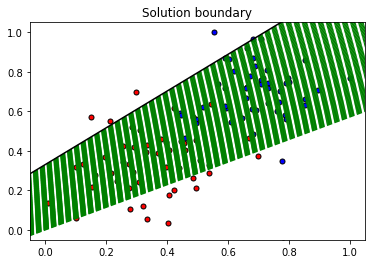

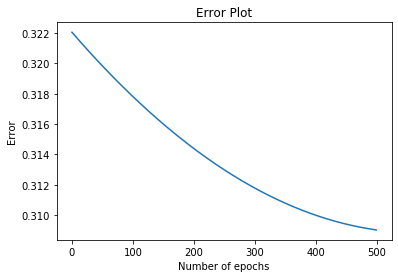

In [67]:
train(X, y, epochs, learnrate, True)